<a href="https://colab.research.google.com/github/arjunsur1/Artificial-Neural-Networks/blob/master/Convolutional%20Neural%20Networks-%20ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

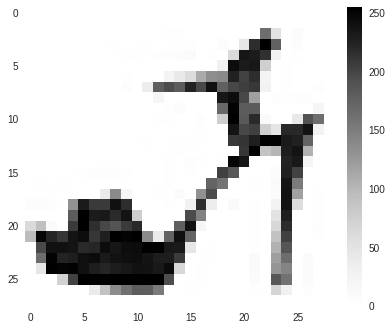

In [5]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)

In [0]:
# input image dimensions
img_x, img_y = 28, 28

In [0]:
train_images = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
test_images = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [0]:
# convert the data to the right type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
num_classes = 10

In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [11]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.5342 - acc: 0.8122
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3475 - acc: 0.8754
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2961 - acc: 0.8920
Epoch 4/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.2655 - acc: 0.9037
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2393 - acc: 0.9118


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 101us/step
Test accuracy: 0.9114


In [0]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.5188 - acc: 0.8122
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3230 - acc: 0.8828
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2753 - acc: 0.9004
Epoch 4/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2431 - acc: 0.9111
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.2155 - acc: 0.9212


In [17]:
test_loss_2, test_acc_2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_2)

10000/10000 [==============================] - 1s 90us/step
Test accuracy: 0.9036
